# Pymaceuticals Inc.
---

### Analysis

We have a result of a study for 249 mice who were indentified with SCC tumors and receceived treatment with a range of drug regimens.

These results show us the following relevant data.

 * The Ramicane obtained the smallest average volume of tumors despite being one of the samples with a large sample.
 * For capomulin there is a positive relationship between weight and average tumor volume.
 * For mouse I509 we can observe that when the Capomulin treatment began, the volume of the tumor began to grow, however as the days passed it decreased, it had some peaks but in general the drug decreased the volume of the tumor by 2.5 units after 45 days.

In [19]:
# Dependencies and Setuplos siguientes datos relevantes
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
mice = data_df['Mouse ID'].nunique()
print (mice)

249


In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_values = data_df[data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_ids = duplicate_values['Mouse ID'].unique()
duplicate_ids


array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = data_df.loc[data_df["Mouse ID"] == "g989"]
duplicate_mouse_data.head(len(duplicate_mouse_data['Mouse ID']))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
clean_mouse_data = data_df[data_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
mice_new= clean_mouse_data['Mouse ID'].nunique()
print (mice_new)

248


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = clean_mouse_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_grouped_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 'Median Tumor Volume': tumor_median,
                                   'Tumor Volume Std. Dev.': tumor_stdev, 'Tumor Volume Std. Err.': tumor_sem})

summary_grouped_df.head(len(summary_df['Drug Regimen']))

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
summary_agg.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

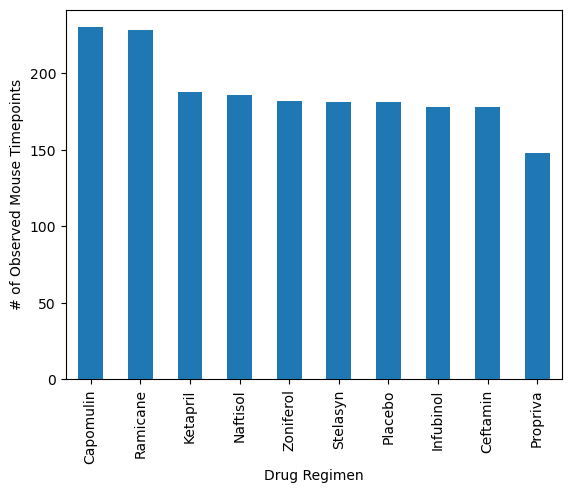

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = clean_mouse_data['Drug Regimen'].value_counts().plot.bar(width=0.5, zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")



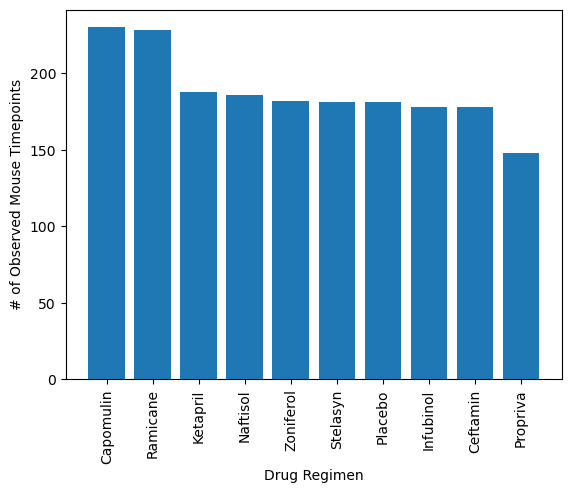

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

count_dr = clean_mouse_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(count_dr))
plt.bar(x_axis, count_dr, width = 0.8, zorder=3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_dr.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


Text(0, 0.5, 'Sex')

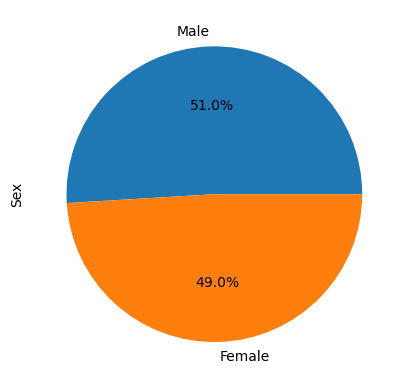

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

data_pandas = clean_mouse_data['Sex'].value_counts()
pie_plot = data_pandas.plot.pie(autopct="%1.1f%%", )
pie_plot.set_ylabel('Sex')

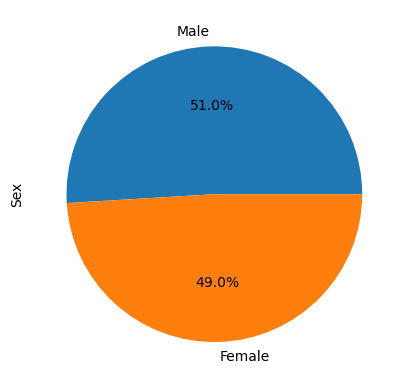

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
data = clean_mouse_data['Sex'].value_counts()
plt.pie(data,labels=data.index.values, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_mouse = pd.DataFrame(clean_mouse_data.groupby('Mouse ID').max()['Timepoint'])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df_clean= pd.merge(max_time_mouse, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_names:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_drug = merged_df_clean.loc[merged_df_clean["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    # add subset 
    drug_values.append(max_drug)
    # Determine outliers using upper and lower bounds
    quartiles = max_drug.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = max_drug.loc[(max_drug < lower_bound) | (max_drug > upper_bound)]
    print(f"{drug}'s potential outliers:  {outliers}")

Capomulin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:  31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


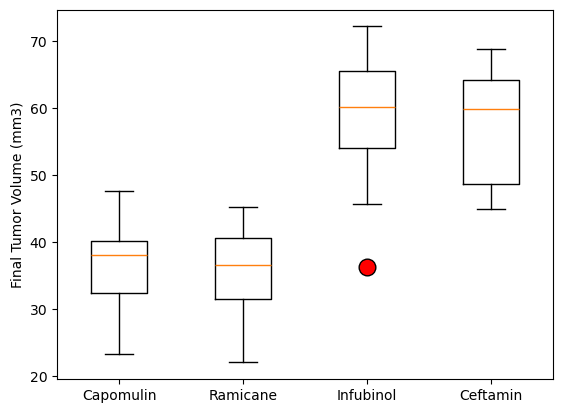

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(drug_values, labels=drug_names, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

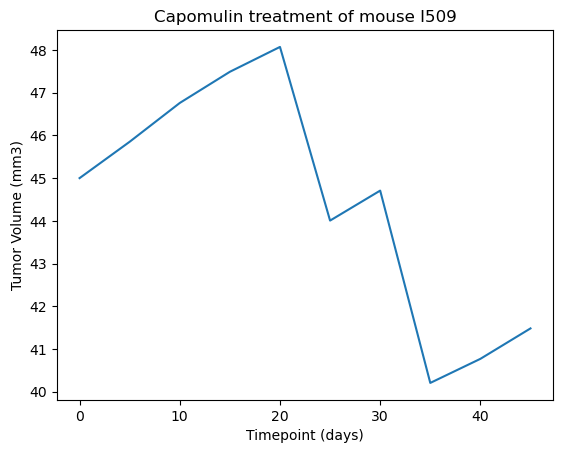

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_capomulin = clean_mouse_data[(clean_mouse_data['Drug Regimen'] == 'Capomulin') & (clean_mouse_data['Mouse ID'] == 'l509')]

plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

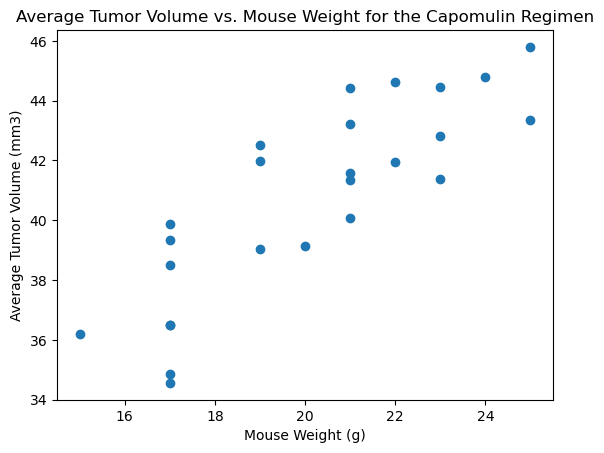

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']
average_tumor_vol = capomulin_df.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
unique_we= clean_mouse_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_df = pd.merge(average_tumor_vol, unique_we, on='Mouse ID')

plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


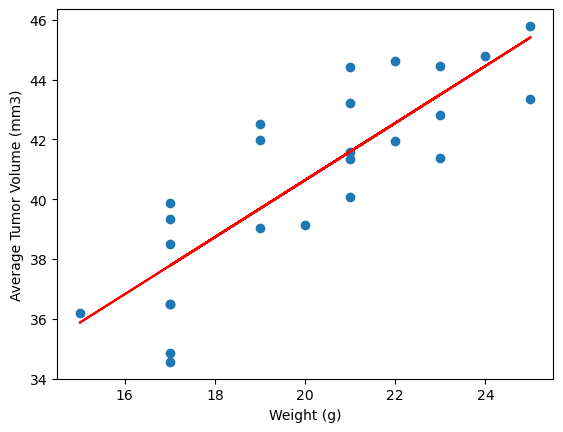

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
avg_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_df = pd.merge(avg_vol, capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')
x_values = merged_df['Weight (g)']
y_values = merged_df['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values, y_values)

print(f"The correlation between mouse weight and average tumor volume is {correlation[0]:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
